### Bucket test for all four sensors


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Our value of atmospheric pressure is ?
p_atmos = 10.1325 # decibars - replace with value from our notes
g = 9.80665 # gravitational acceleration (m s^-2)
rhow = 1000 # density of feshwater for bucket test (kg m^3) - replace with our measured value when we move to saltwater

# Define  time bounds
start_time = "2025-11-09 12:39:00"
end_time   = "2025-11-09 12:41:00"

# Full pathname to location of data file (replace this with correct location on your computer)
data_dir = "C:/crs/proj/FA_science/"

# file names

yellow_file = "202769_20251109_1251-YELLOW_data.txt"
blue_file =   "202771_20251109_1243-BLUE_data.txt"
green_file =  "202772_20251109_1252-GREEN_data.txt"
red_file =    "202774_20251109_1249-RED_data.txt"

# A clunky way to do this, but we will use pandas to read each csv file, and convert the time column into an index
# and repeat for all four sensors

#Yellow sensor
df = pd.read_csv(data_dir+yellow_file, parse_dates=['Time'], index_col='Time')
# Making time the index "removes" the 'Time' column...add it back in
df['Time'] = df.index
# Trim the dataset
df = df.loc[start_time:end_time]
# Compute the pressure
df['Depth'] = ( df['Pressure'] - p_atmos )*1e4 / (rhow*g)
# rename the dataframe
df_yellow = df

# Blue sensor
df = pd.read_csv(data_dir+blue_file, parse_dates=['Time'], index_col='Time')
# Making time the index "removes" the 'Time' column...add it back in
df['Time'] = df.index
# Trim the dataset
df = df.loc[start_time:end_time]
# Compute the pressure
df['Depth'] = ( df['Pressure'] - p_atmos )*1e4 / (rhow*g)
# rename the dataframe
df_blue = df

# greeen sensor
df = pd.read_csv(data_dir+green_file, parse_dates=['Time'], index_col='Time')
# Making time the index "removes" the 'Time' column...add it back in
df['Time'] = df.index
# Trim the dataset
df = df.loc[start_time:end_time]
# Compute the pressure
df['Depth'] = ( df['Pressure'] - p_atmos )*1e4 / (rhow*g)
# rename the dataframe
df_green = df

# red sensor
df = pd.read_csv(data_dir+red_file, parse_dates=['Time'], index_col='Time')
# Making time the index "removes" the 'Time' column...add it back in
df['Time'] = df.index
# Trim the dataset
df = df.loc[start_time:end_time]
# Compute the pressure
df['Depth'] = ( df['Pressure'] - p_atmos )*1e4 / (rhow*g)
# rename the dataframe
df_red = df

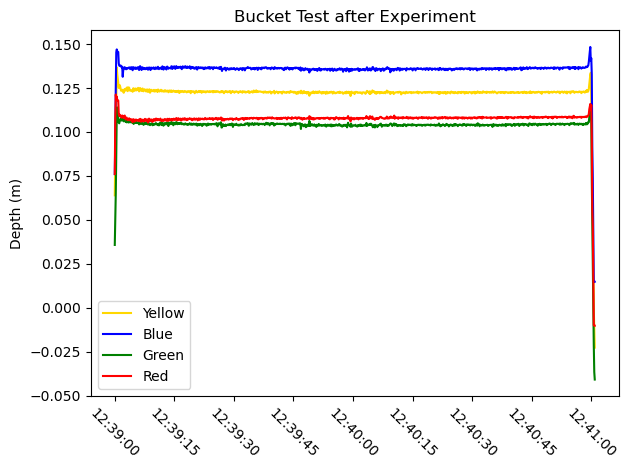

In [3]:
# make a plot of that data
plt.plot( df_yellow['Time'], df_yellow['Depth'],c='gold', label = 'Yellow')
plt.plot( df_blue['Time'], df_blue['Depth'],c='blue', label = 'Blue')
plt.plot( df_green['Time'], df_green['Depth'],c='green', label = 'Green')
plt.plot( df_red['Time'], df_red['Depth'],c='red', label='Red')
plt.ylabel( 'Depth (m)' )
plt.xticks(rotation=-45)
plt.legend()
plt.title('Bucket Test after Experiment')
plt.tight_layout()
plt.show()

In [4]:
# Trim a little more so we can calculate the mean and standard deviation while in the bucket
start_time = "2025-11-09 12:39:15"
end_time   = "2025-11-09 12:40:45"

df_yellow = df_yellow.loc[start_time:end_time]
df_blue = df_blue.loc[start_time:end_time]
df_green = df_green.loc[start_time:end_time]
df_red = df_red.loc[start_time:end_time]

print(f"Yellow: {df_yellow['Depth'].mean():.3f} +/- {df_yellow['Depth'].std():.4f}")
print(f"Blue  : {df_blue['Depth'].mean():.3f} +/- {df_blue['Depth'].std():.4f}")
print(f"Green : {df_green['Depth'].mean():.3f} +/- {df_green['Depth'].std():.4f}")
print(f"Red   : {df_red['Depth'].mean():.3f} +/- {df_red['Depth'].std():.4f}")


Yellow: 0.123 +/- 0.0004
Blue  : 0.136 +/- 0.0005
Green : 0.104 +/- 0.0005
Red   : 0.108 +/- 0.0004


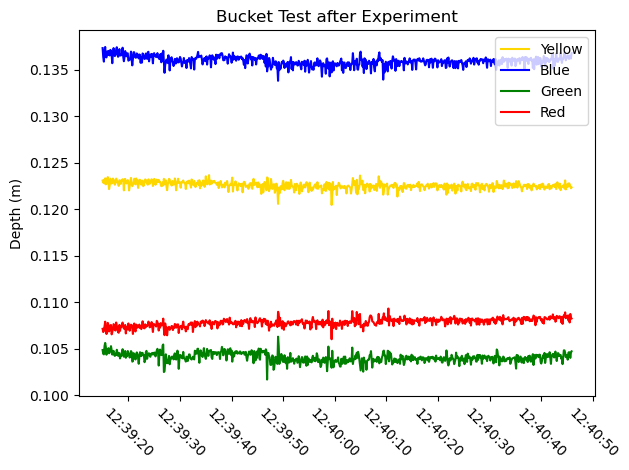

In [5]:
# replot the data now that it it trimmed
plt.plot( df_yellow['Time'], df_yellow['Depth'],c='gold', label = 'Yellow')
plt.plot( df_blue['Time'], df_blue['Depth'],c='blue', label = 'Blue')
plt.plot( df_green['Time'], df_green['Depth'],c='green', label = 'Green')
plt.plot( df_red['Time'], df_red['Depth'],c='red', label='Red')
plt.ylabel( 'Depth (m)' )
plt.xticks(rotation=-45)
plt.legend()
plt.title('Bucket Test after Experiment')
plt.tight_layout()
plt.show()